#### Тема “Обучение без учителя”, Задание 1.

In [298]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt

In [299]:
data = load_boston()
X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = pd.DataFrame(data['target'], columns=['target'])

In [300]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [301]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [302]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

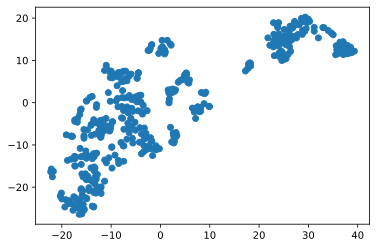

In [303]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

Дополнительно поэкспериментируем с новой библиотекой
!pip install plotly      

In [304]:
import plotly.express as px
# В дальнейшем эту библиотеку удобно использовать для анимации графиков
# https://plotly.com/python/animations/

my_experiment = pd.DataFrame(X_train_tsne, columns=['my_X', 'my_y'])
px.scatter(my_experiment, x='my_X',  y='my_y')
# animation_frame= , animation_group=, size= , color= , hover_name= , log_x=True/False, size_max= , 
#range_x=[100,100000], range_y=[25,90]

#### Тема “Обучение без учителя”, Задание 2.

In [305]:
model = KMeans(n_clusters=3, max_iter=100, random_state=42)
train_labels = model.fit_predict(X_train_scaled)
train_labels

array([1, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 0, 1, 0, 0, 0, 2, 0, 2, 1, 0,
       2, 0, 2, 0, 1, 2, 0, 2, 0, 0, 1, 1, 0, 2, 2, 0, 0, 2, 2, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 2, 0, 1, 1, 1, 1, 2, 0, 1, 1, 1, 2,
       1, 0, 0, 1, 1, 2, 2, 0, 1, 1, 0, 1, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0,
       1, 2, 0, 2, 2, 1, 1, 1, 0, 0, 0, 1, 1, 0, 2, 1, 1, 2, 2, 1, 2, 0,
       0, 0, 0, 1, 0, 2, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 2, 0,
       2, 1, 1, 1, 1, 1, 2, 0, 1, 0, 1, 2, 2, 0, 2, 0, 0, 2, 2, 1, 2, 2,
       1, 1, 2, 0, 0, 0, 1, 0, 1, 1, 2, 2, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 2, 0, 0, 0, 0, 2, 0, 1, 0, 1, 2, 1, 0, 1,
       1, 1, 1, 0, 0, 2, 2, 0, 2, 0, 1, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2,
       2, 1, 1, 0, 2, 1, 1, 0, 2, 2, 1, 0, 2, 1, 0, 0, 1, 0, 1, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 1, 0, 1, 0, 0, 2, 0, 1, 1, 2, 1, 0, 1, 0, 0,
       1, 2, 2, 0, 1, 2, 1, 1, 1, 0, 2, 1, 0, 0, 0,

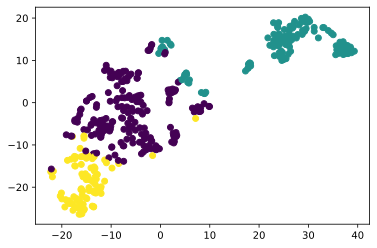

In [306]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=train_labels)

In [307]:
for i in range(0, 3):
    print(f"Среднее значение CRIM в кастере {i}: {np.mean(X_train_scaled['CRIM'].loc[train_labels==i])}")  

Среднее значение CRIM в кастере 0: -0.3595938819415387
Среднее значение CRIM в кастере 1: 0.8109035550510459
Среднее значение CRIM в кастере 2: -0.3988641865191748


In [308]:
for i in range(0, 3):
     print(f"Среднее значение price в кастере {i}: {np.mean(y.loc[0:403, 'target'].loc[train_labels==i])}")

Среднее значение price в кастере 0: 24.592146596858637
Среднее значение price в кастере 1: 23.696062992125967
Среднее значение price в кастере 2: 23.95930232558139


#### Тема “Обучение без учителя”, Задание 3.

In [314]:
test_labels = model.predict(X_test_scaled)
# Методом t-SNE не определить X, y на тестовой выборке, поскольку у метода нет transform
test_labels

array([0, 2, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 2, 1, 2, 2,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 1, 0, 0, 1, 0, 0, 2, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 0, 0, 2, 0,
       1, 2, 2, 1, 0, 1, 1, 2, 0, 1, 0, 2, 1, 1, 2, 1, 2, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0])

In [315]:
for i in range(0, 3):
    print(f"Среднее значение CRIM в кастере {i}: {np.mean(X_test_scaled['CRIM'].loc[test_labels==i])}")  

Среднее значение CRIM в кастере 0: -0.3771458000659118
Среднее значение CRIM в кастере 1: 0.7396611726050218
Среднее значение CRIM в кастере 2: -0.40016218898562156


In [316]:
for i in range(0, 3):
     print(f"Среднее значение price в кастере {i}: {np.mean(y_test['target'].loc[test_labels==i])}")

Среднее значение price в кастере 0: 21.860784313725492
Среднее значение price в кастере 1: 16.437142857142856
Среднее значение price в кастере 2: 31.35
